In [1]:
# Usual suspect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys
sys.path.insert(1, '../muograph/')

![alternative text](../images/muograph_logo.png)


<h1><center>POCA tutorial</center></h1>

Point Of Closest Approach computation is handled by the `POCA` class of the POCA.py file.

First we define the Volume of interest using the `VolumeInterest` class.

In [2]:
from volume.Volume_Interest import VolumeInterest

VOI = VolumeInterest(position = [0,0,835],
                     dimension=[400,1000,300],
                     voxel_width=20)

Then we apply the tracking routine. 

In [3]:
from tracking.Tracking import Tracking
from utils.read_file import hits_csv_to_tensor

hits,E = hits_csv_to_tensor(n_event=10000)

tracks = Tracking(hits=hits,voi=VOI,E=E)


Tracking in progress


Tracking done
Scattering angles computation done


In [4]:
from reconstruction.POCA import POCA

poca = POCA(output_dir="",tracks=tracks)
poca


POCA/ directory created

Total # event =  10000
# event after removing low theta events =  3756



Assigning voxel to each POCA point:


DONE


POCA points:
Total # event = 10000
# POCA dtheta > 0.01 deg = 3756
# POCA in VOI = 2793

## 1 - POCA points: location

We can now apply some cuts and plot the POCA points location.

***NB:*** Here we only consider the POCA points position, witheout looking at the scattering amplitude.

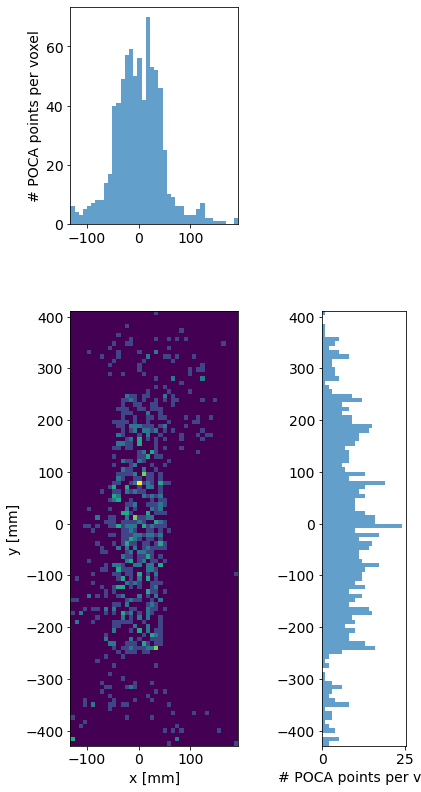

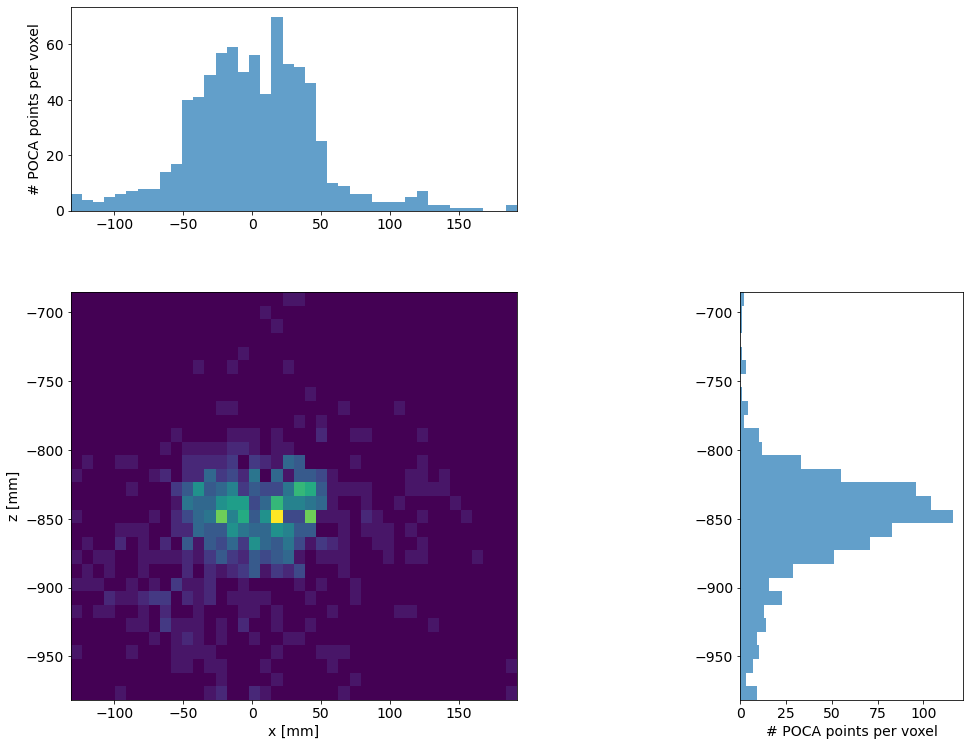

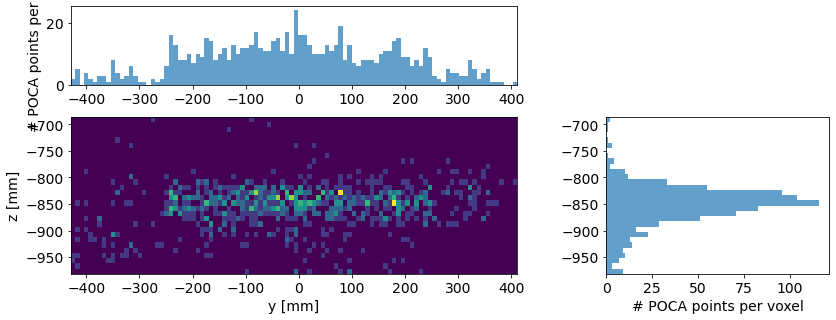

In [7]:
from plotting.Plotting import plot_POCA_points_multi_projection
import math
# ploting only POCA points for which dtheta > 1 deg 
plot_POCA_points_multi_projection(POCA_points = poca.POCA_points,
                                  mask = poca.tracks.dtheta*180/math.pi>1,
                                  binning_xyz=VOI.n_vox_xyz*2)

## 2- POCA points: location and scattering amplitude

Now that the POCA points are computed, we can apply score to them in order to generate the scattering density map. It is done using the following logic:

- 1/ **Assign** an **empty list** $S_{ijk}$ to **each voxel**.


- 2/ **for each event**:
    - for each POCA points in voxel with indices $i,j,k$:
        
        - **Append** the desired **feature** `score_feature` (scattering angle $d\theta$ in this case) to $S_{ijk}$ **if** the event **satisfies** the **condition**: 
        
        $$d\theta_{min}\:<\:d\theta\:<\: d\theta_{max}$$
        
- 3/ **for each voxel**:
    - Assign a final score `final_scores` to the voxel based on its `score_list`, using the desired function (`rms_list` in this case).
    
    
The `final_scores` tensor can be used to **plot** the **scattering density map** of the VOI, using the `plot_VOI_pred()` method.




Assigning score to voxels:


DONE

Computing final scores:


DONE


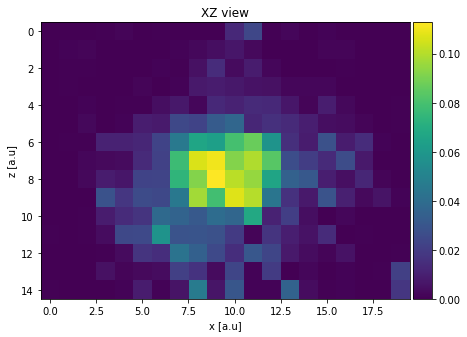

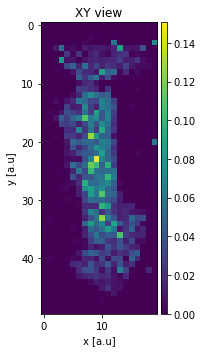

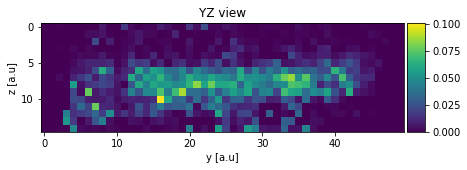

In [10]:
import math
def rms_list(x:List):
    return np.sqrt(np.mean(np.array(x)))

from functools import partial
final_scores = poca.poca_analysis(score_feature=[poca.tracks.dtheta,"dtheta"], 
                                  dtheta_range=[0., math.pi/2], 
                                  score_method=partial(rms_list),
                                  save=True,
                                  plot=True)


POCA/feature_dtheta_method_rms_list_0.02_0.14_rad/ directory created

Assigning score to voxels:


DONE

Computing final scores:


DONE


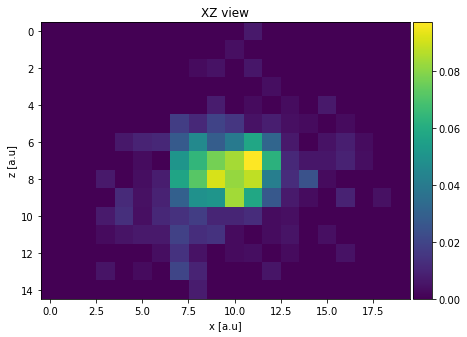

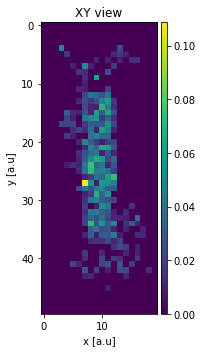

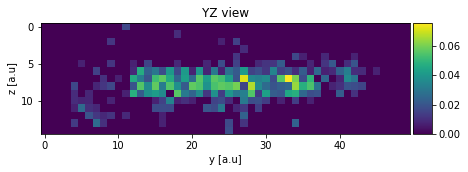

In [11]:
def rms_list_square(x:List):
    return np.mean(np.array(x))

final_scores = poca.poca_analysis(score_feature=[poca.tracks.dtheta,"dtheta"], 
                                  dtheta_range=[1*math.pi/180, 8*math.pi/180], 
                                  score_method=partial(rms_list),
                                  save=True,
                                  plot=True)